# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/job-postings-dataset/job_data_merged_1.csv


# Reading the Data

In [2]:
df = pd.read_csv("/kaggle/input/job-postings-dataset/job_data_merged_1.csv")
df.head()

,Unnamed: 0,Category,Workplace,Location,Department,Type
0,0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,4,Business Analyst,Remote,United Kingdom,Operations,Full time


# Drop unnecessary columns 

In [3]:
df.drop("Unnamed: 0", axis = 1, inplace=True )
df.head()

,Category,Workplace,Location,Department,Type
0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,Business Analyst,Remote,United Kingdom,Operations,Full time


# Create Country Column for further analysis

In [4]:
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()
df.head()

,Category,Workplace,Location,Department,Type,Country
0,Business Analyst,Remote,United Kingdom,Operations,Full time,United Kingdom
1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time,Philippines
2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time,Kuwait
3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time,United Kingdom
4,Business Analyst,Remote,United Kingdom,Operations,Full time,United Kingdom


# Check missing values 

In [5]:
df.isnull().sum()

Category        0
Workplace      56
Location       68
Department    166
Type          169
Country        68
dtype: int64

# Global Analysis

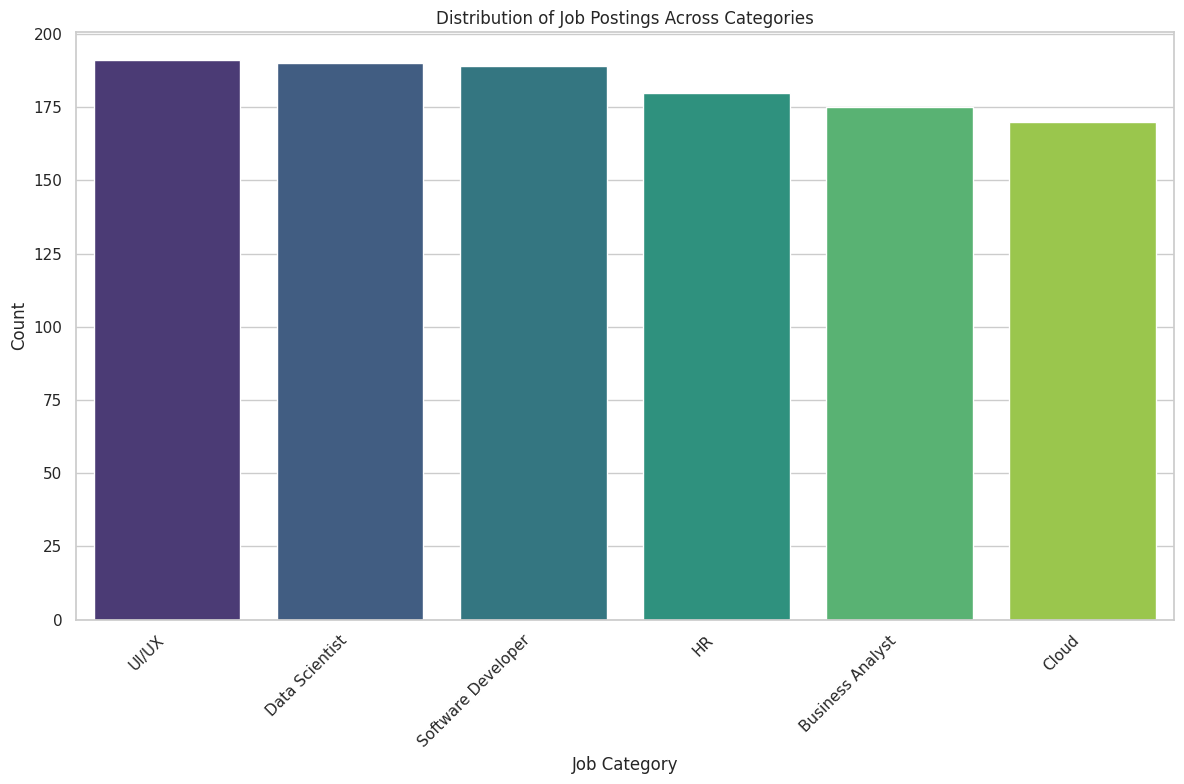

In [6]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histogram for job categories
plt.figure(figsize=(12, 8))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts, palette='viridis')
plt.title('Distribution of Job Postings Across Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

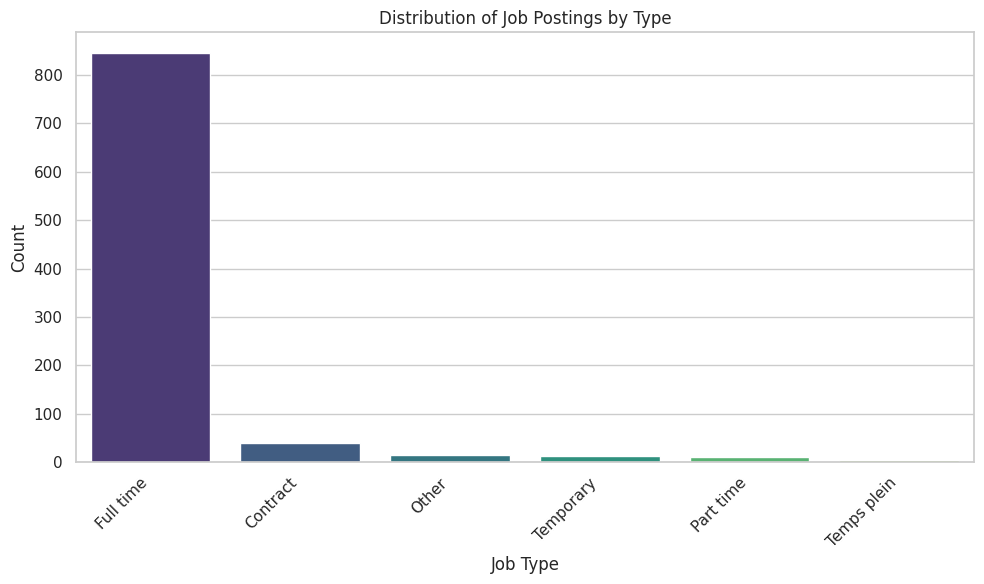

In [7]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histogram for job types
plt.figure(figsize=(10, 6))
type_counts = df['Type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts, palette='viridis')
plt.title('Distribution of Job Postings by Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

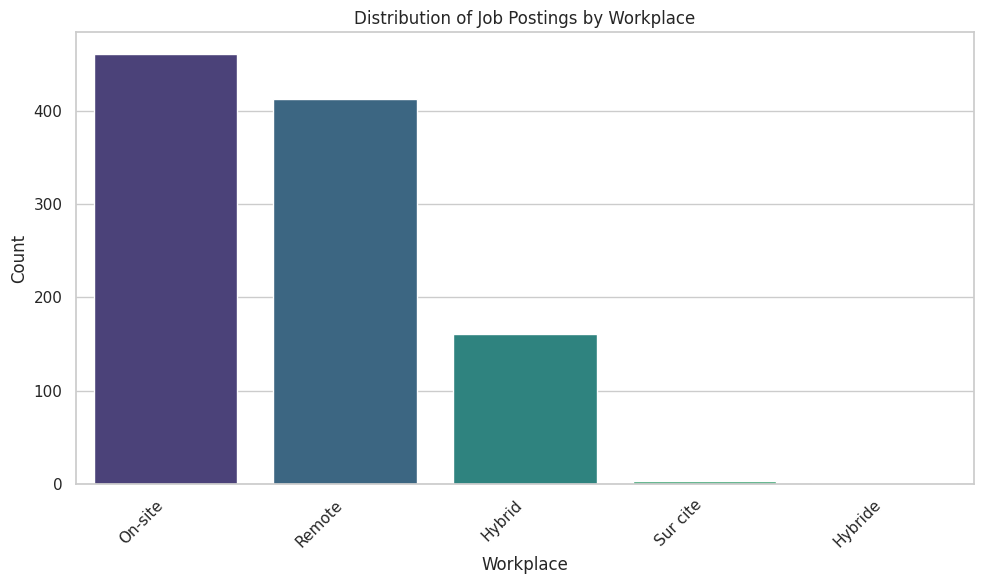

In [8]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histogram for job Workplace
plt.figure(figsize=(10, 6))
type_counts = df['Workplace'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts, palette='viridis')
plt.title('Distribution of Job Postings by Workplace')
plt.xlabel('Workplace')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

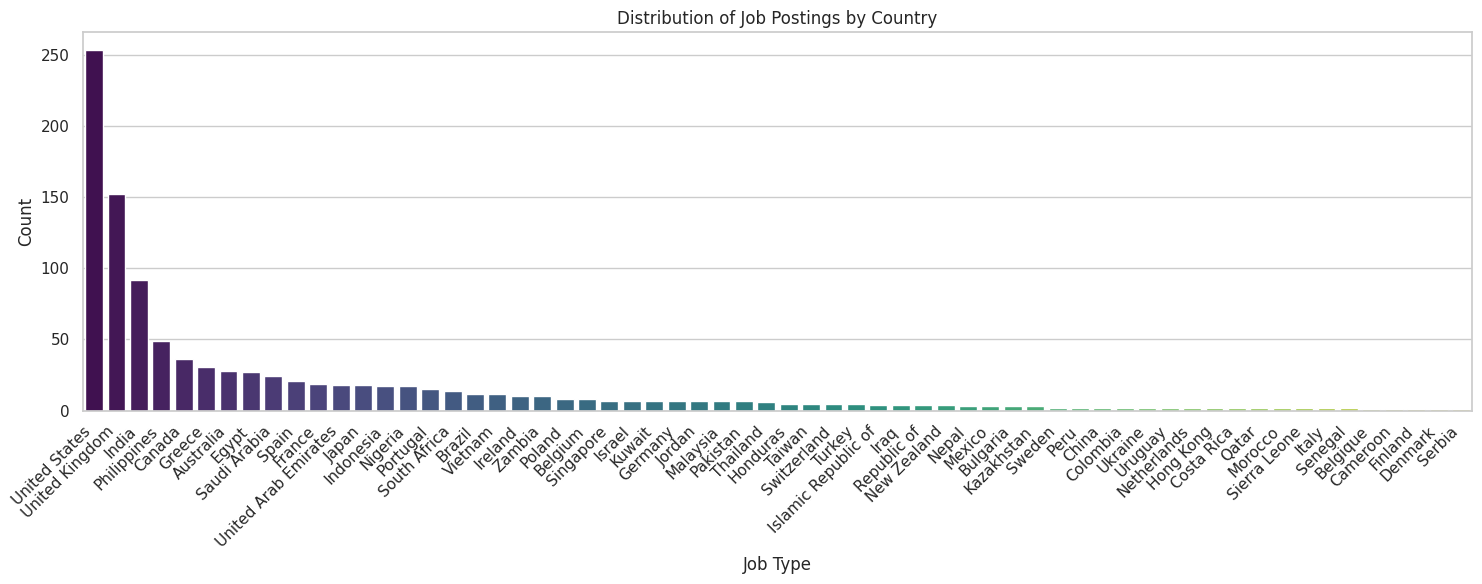

In [9]:
sns.set(style="whitegrid")

# Plot histogram for job Country
plt.figure(figsize=(15, 6))
type_counts = df['Country'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts, palette='viridis')
plt.title('Distribution of Job Postings by Country')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

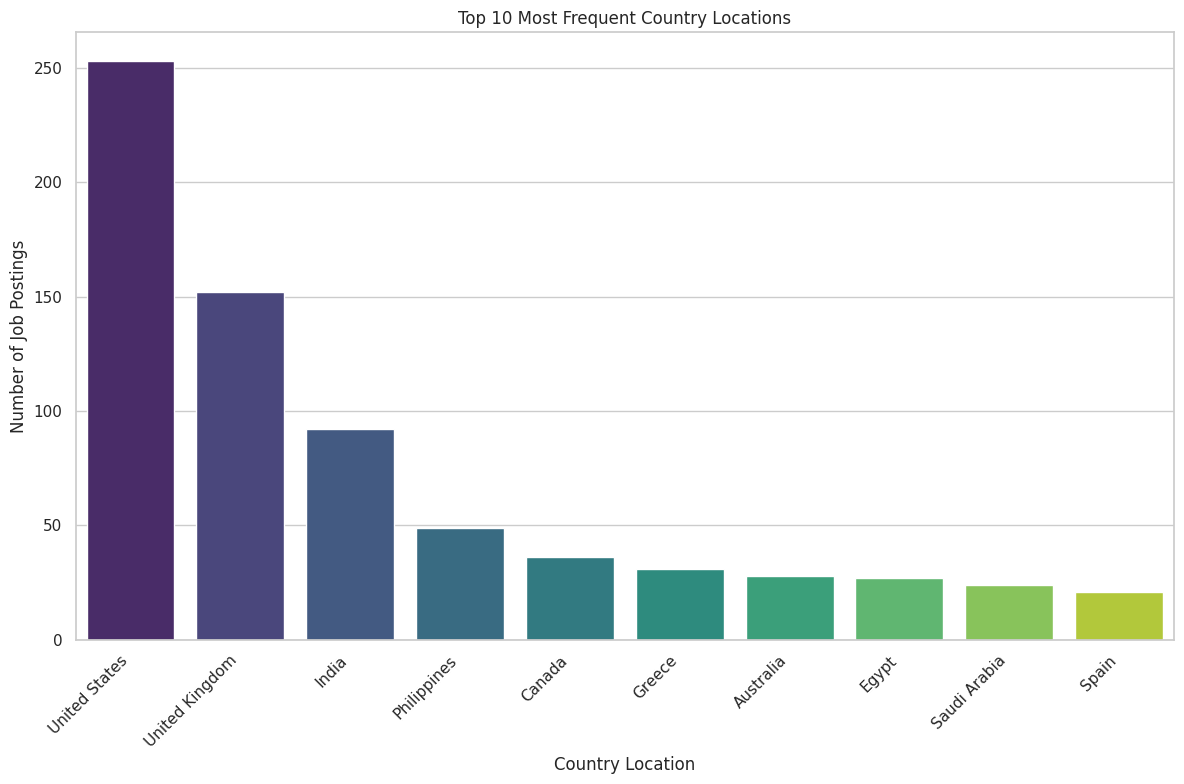

In [10]:
sns.set(style="whitegrid")

# Plot the top 10 most frequent Country locations
plt.figure(figsize=(12, 8))
top_workplaces = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_workplaces.index, y=top_workplaces, palette='viridis')
plt.title('Top 10 Most Frequent Country Locations')
plt.xlabel('Country Location')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

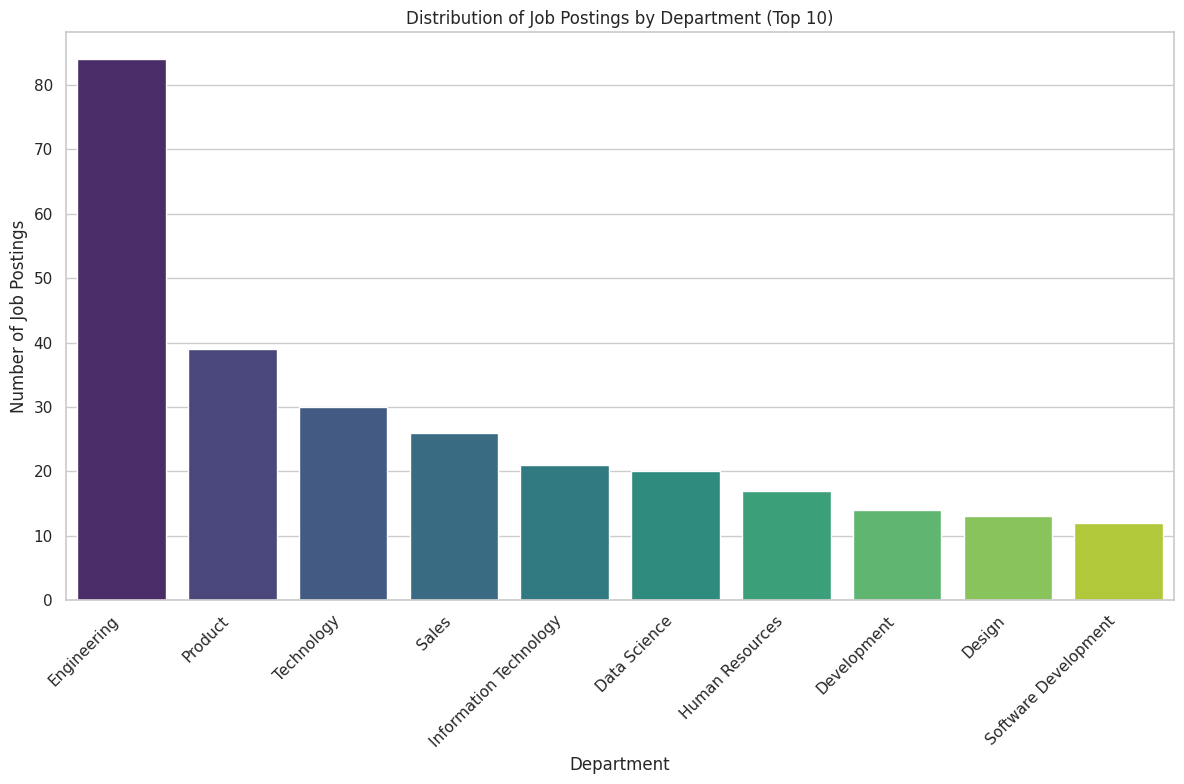

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of job postings by department (Top 10)
plt.figure(figsize=(12, 8))
top_departments = df['Department'].value_counts().nlargest(10)
sns.barplot(x=top_departments.index, y=top_departments, palette='viridis')
plt.title('Distribution of Job Postings by Department (Top 10)')
plt.xlabel('Department')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Counting job postings by workplace
workplace_counts = df['Workplace'].value_counts()

# Creating a pie chart with Plotly Express
fig = px.pie(workplace_counts, names=workplace_counts.index, values=workplace_counts.values,
             title='Distribution of Job Postings by Workplace',
             labels={'label': 'Workplace', 'value': 'Number of Job Postings'},
             color_discrete_sequence=px.colors.qualitative.Set3,  # Choose a color palette
             hole=0.4,  # Adjust the size of the center hole
             )
fig.update_traces(textinfo='percent+label', pull=[0.1] * len(workplace_counts), hoverinfo='percent+label')  # Add percentage and label to each slice
fig.update_layout(legend_title_text='Workplace', legend=dict(title=dict(text='Workplace')),
                  showlegend=True, margin=dict(l=0, r=0, b=0, t=40))  # Add legend and adjust layout
fig.show()

In [13]:
# Counting job postings by category
category_counts = df['Category'].value_counts()

# Creating a pie chart with Plotly Express
fig = px.pie(category_counts, names=category_counts.index, values=category_counts.values,
             title='Distribution of Job Postings by Category',
             labels={'label': 'Category', 'value': 'Number of Job Postings'},
             color_discrete_sequence=px.colors.qualitative.Set1,  # Choose a color palette
             hole=0.4,  # Adjust the size of the center hole
             )
fig.update_traces(textinfo='percent+label', pull=[0.1] * len(category_counts), hoverinfo='percent+label')  # Add percentage and label to each slice
fig.update_layout(legend_title_text='Category', legend=dict(title=dict(text='Category')),
                  showlegend=True, margin=dict(l=0, r=0, b=0, t=40))  # Add legend and adjust layout
fig.show()

In [14]:
# Counting job postings by type
type_counts = df['Type'].value_counts()

# Creating a pie chart with Plotly Express
fig = px.pie(type_counts, names=type_counts.index, values=type_counts.values,
             title='Distribution of Job Postings by Type',
             labels={'label': 'Type', 'value': 'Number of Job Postings'},
             color_discrete_sequence=px.colors.qualitative.Set2,  # Choose a color palette
             hole=0.4,  # Adjust the size of the center hole
             )
fig.update_traces(textinfo='percent+label', pull=[0.1] * len(type_counts), hoverinfo='percent+label')  # Add percentage and label to each slice
fig.update_layout(legend_title_text='Type', legend=dict(title=dict(text='Type')),
                  showlegend=True, margin=dict(l=0, r=0, b=0, t=40))  # Add legend and adjust layout
fig.show()

# Job Category Analysis

## Business Analyst Analysis 

In [15]:
df['Category'].unique()

array(['Business Analyst', 'Cloud', 'Data Scientist', 'HR',
       'Software Developer', 'UI/UX'], dtype=object)

In [16]:
BA_df = df[df['Category'] == 'Business Analyst'] 
cloud_df = df[df['Category'] == 'Cloud'] 
DS_df = df[df['Category'] == 'Data Scientist'] 
HR_df = df[df['Category'] == 'HR'] 
SD_df = df[df['Category'] == 'Software Developer'] 
UI_df = df[df['Category'] == 'UI/UX'] 

In [17]:
BA_df.isnull().sum()

Category       0
Workplace      3
Location       1
Department    23
Type          30
Country        1
dtype: int64

In [18]:
def visualize_bar_plot(dataframe, column_name):
    """
    Visualize a bar plot for the frequency of values in a specific column.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the column to visualize
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, data=dataframe, palette='viridis')
    plt.title(f'Frequency of {column_name} for {dataframe["Category"].iloc[0]} Position')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
    plt.show()

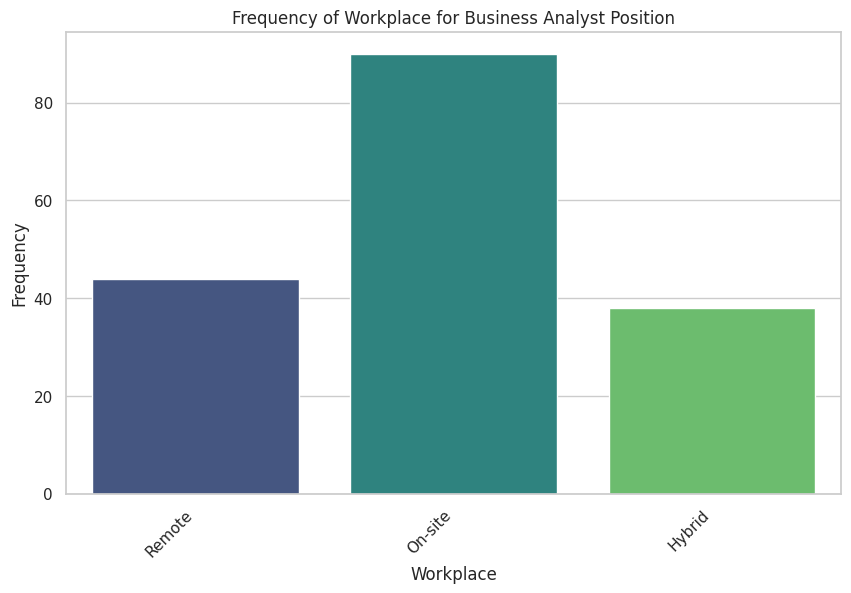

In [19]:
visualize_bar_plot(BA_df, 'Workplace')

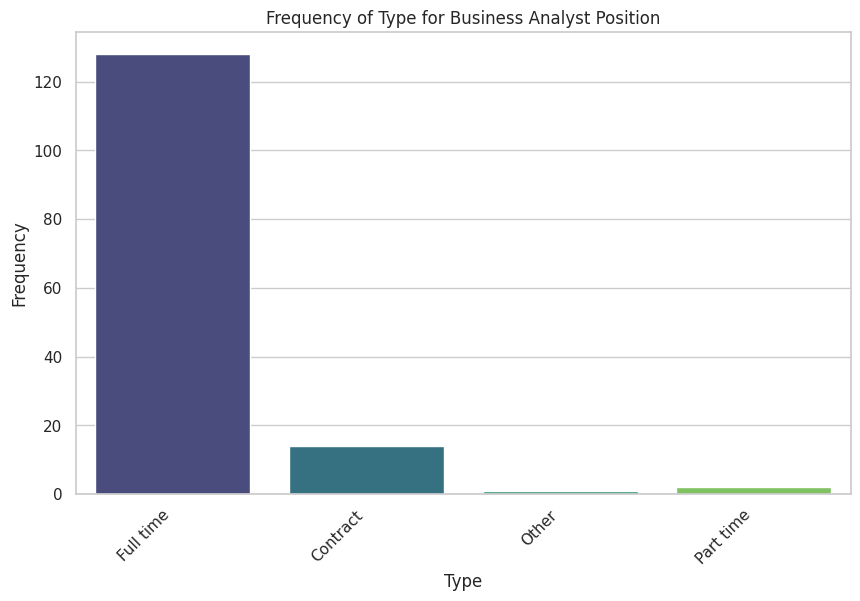

In [20]:
visualize_bar_plot(BA_df, 'Type')

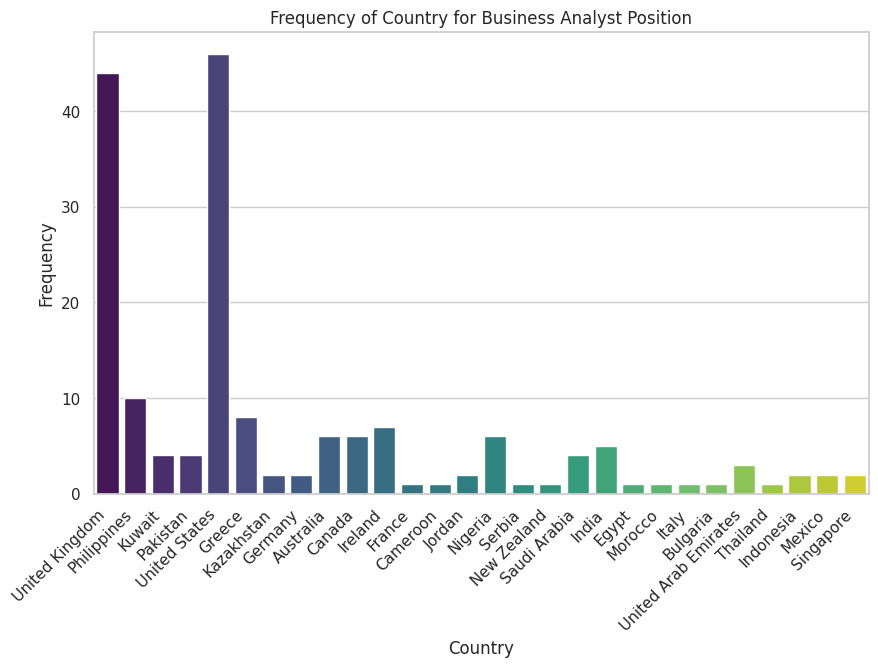

In [21]:
visualize_bar_plot(BA_df, 'Country')

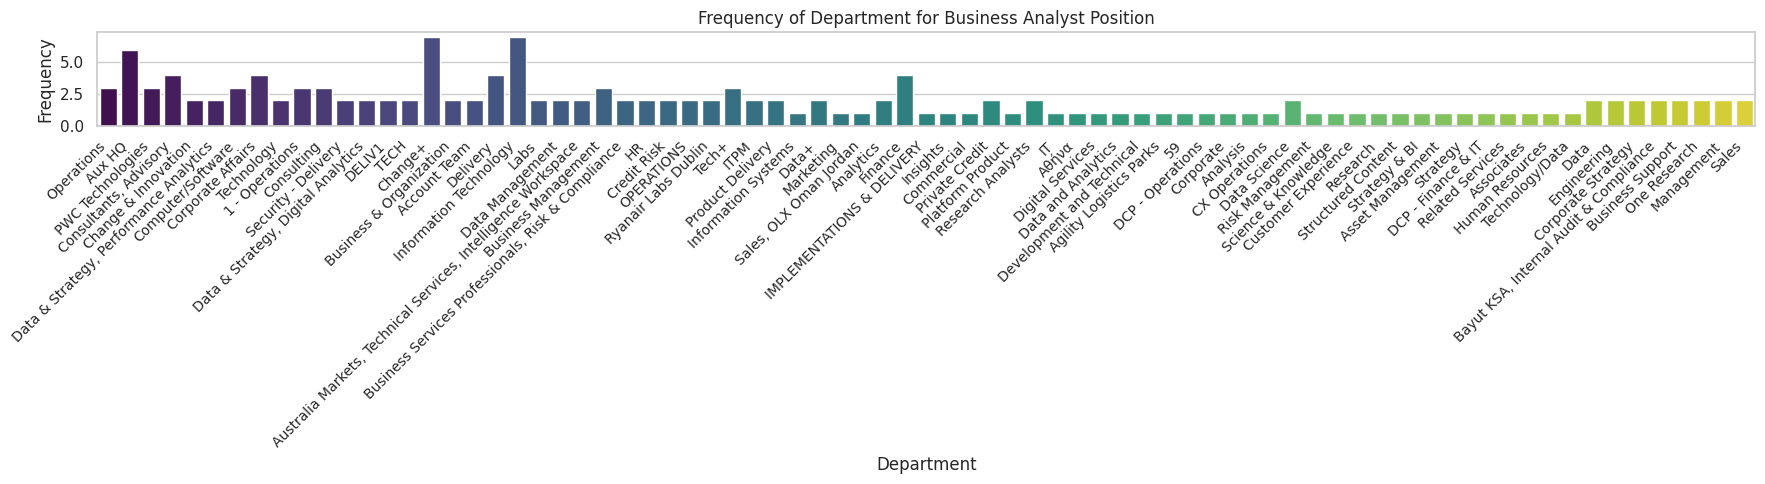

In [22]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Department', data=BA_df, palette='viridis')
plt.title(f'Frequency of Department for {BA_df["Category"].iloc[0]} Position')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and fontsize
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [23]:
fig = px.bar(BA_df, x='Department', title=f'Frequency of Department for {BA_df["Category"].iloc[0]} Position', labels={'Department': 'Frequency'}, height=400)
fig.update_layout(xaxis=dict(tickangle=-45, tickfont=dict(size=10)), margin=dict(l=0, r=0, t=30, b=0))

fig.show()

## Cloud Analysis 

In [24]:
cloud_df.isnull().sum()

Category       0
Workplace     10
Location       9
Department    27
Type          29
Country        9
dtype: int64

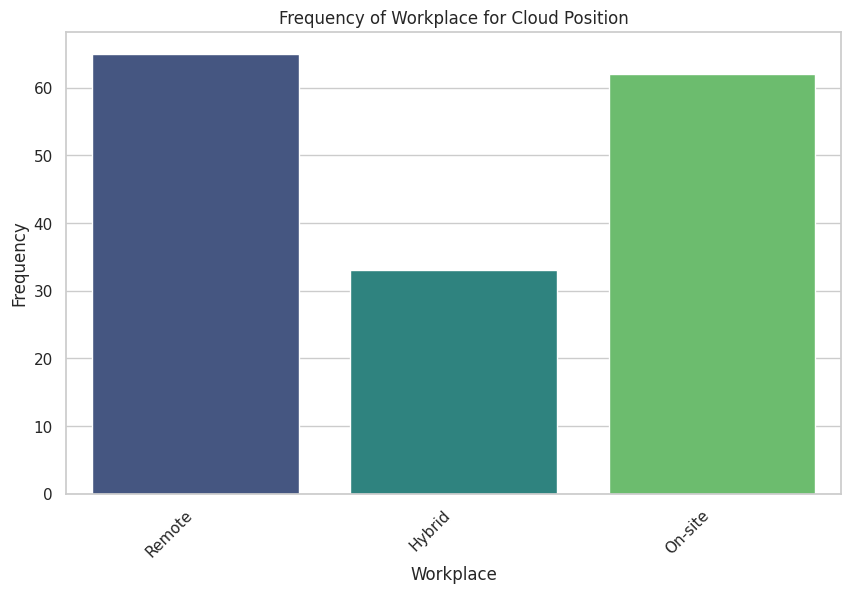

In [25]:
visualize_bar_plot(cloud_df, 'Workplace')

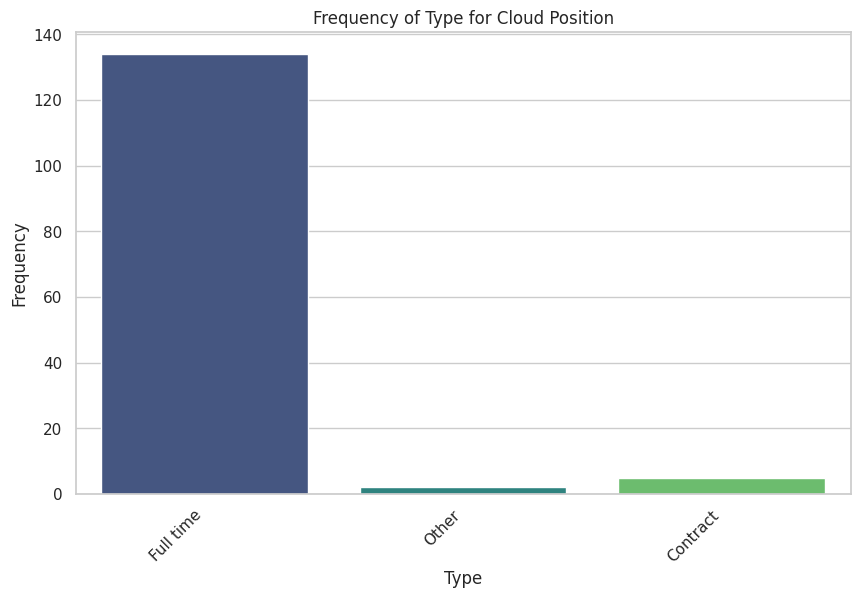

In [26]:
visualize_bar_plot(cloud_df, 'Type')

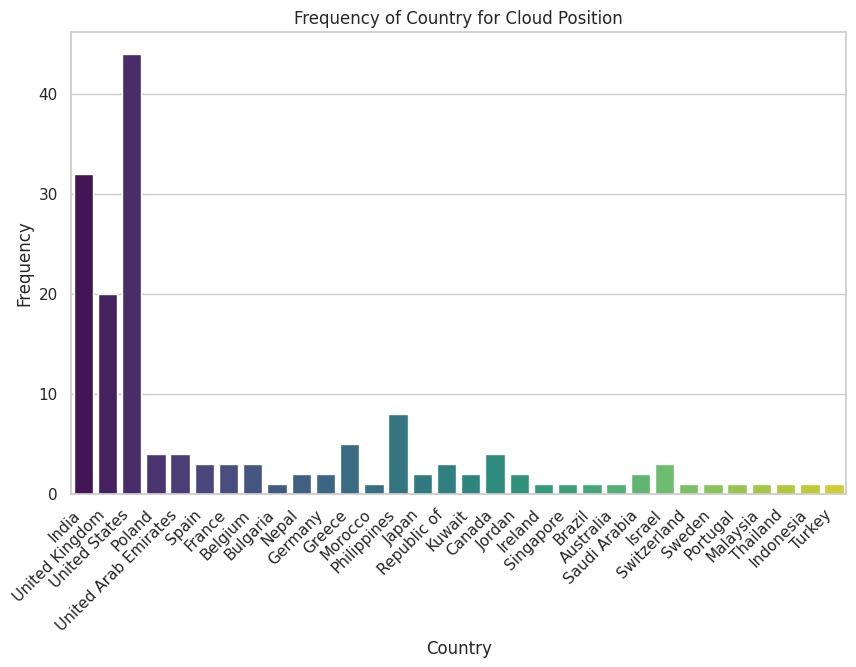

In [27]:
visualize_bar_plot(cloud_df, 'Country')

/tmp/ipykernel_33/2830339192.py:7: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.



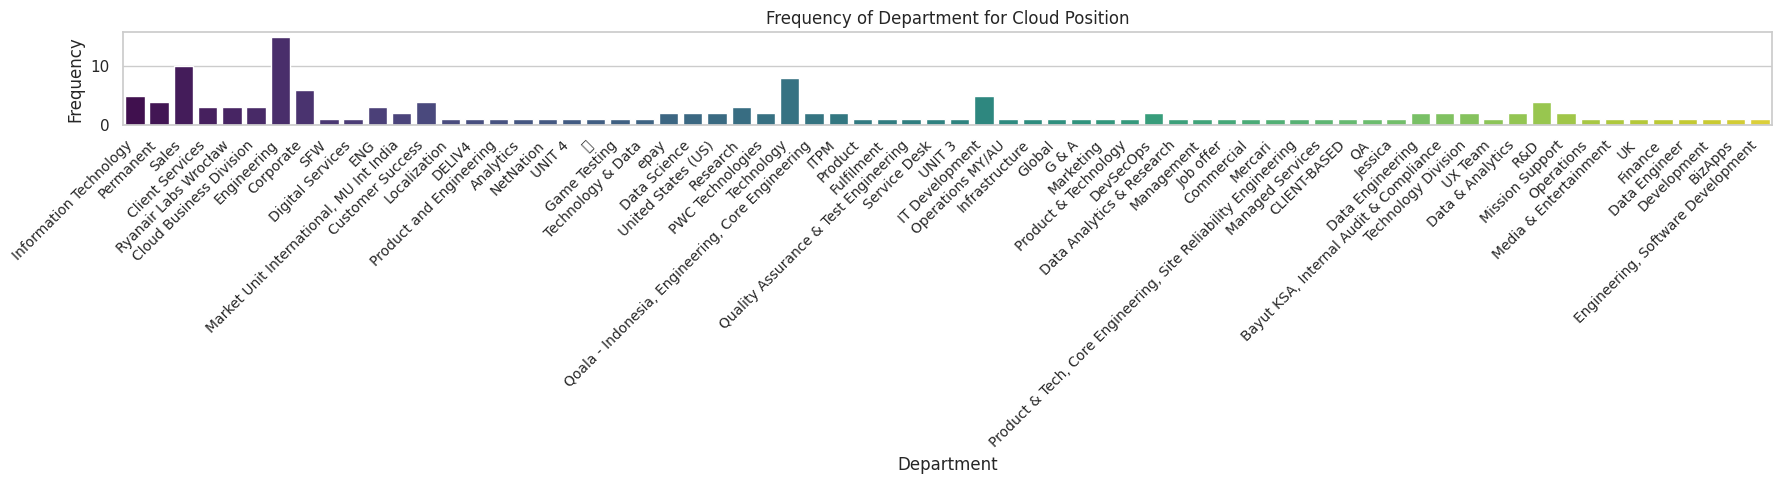

In [28]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Department', data=cloud_df, palette='viridis')
plt.title(f'Frequency of Department for {cloud_df["Category"].iloc[0]} Position')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and fontsize
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [29]:
fig = px.bar(cloud_df, x='Department', title=f'Frequency of Department for {cloud_df["Category"].iloc[0]} Position', labels={'Department': 'Frequency'}, height=400)
fig.update_layout(xaxis=dict(tickangle=-45, tickfont=dict(size=10)), margin=dict(l=0, r=0, t=30, b=0))

fig.show()

## Data Scientist Analysis

In [30]:
DS_df.isnull().sum()

Category       0
Workplace     12
Location      16
Department    33
Type          28
Country       16
dtype: int64

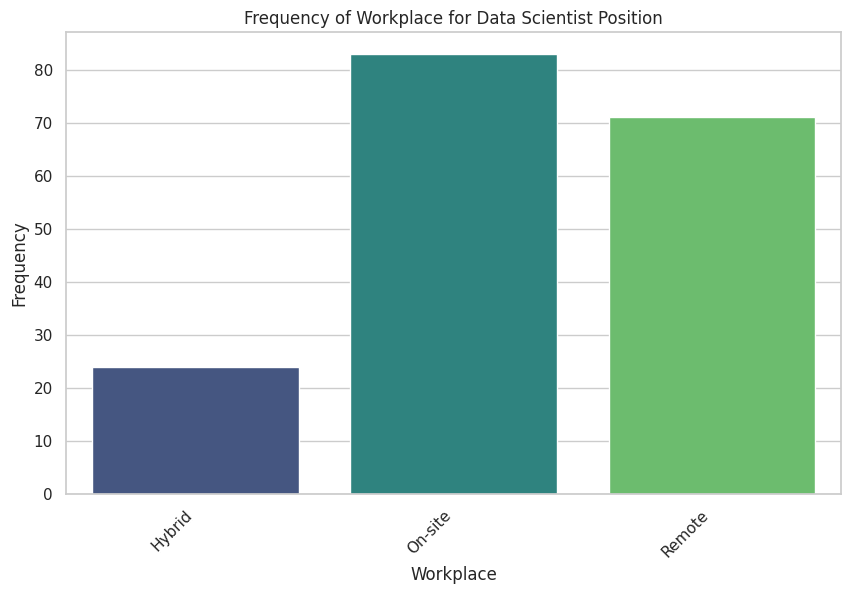

In [31]:
visualize_bar_plot(DS_df, 'Workplace')

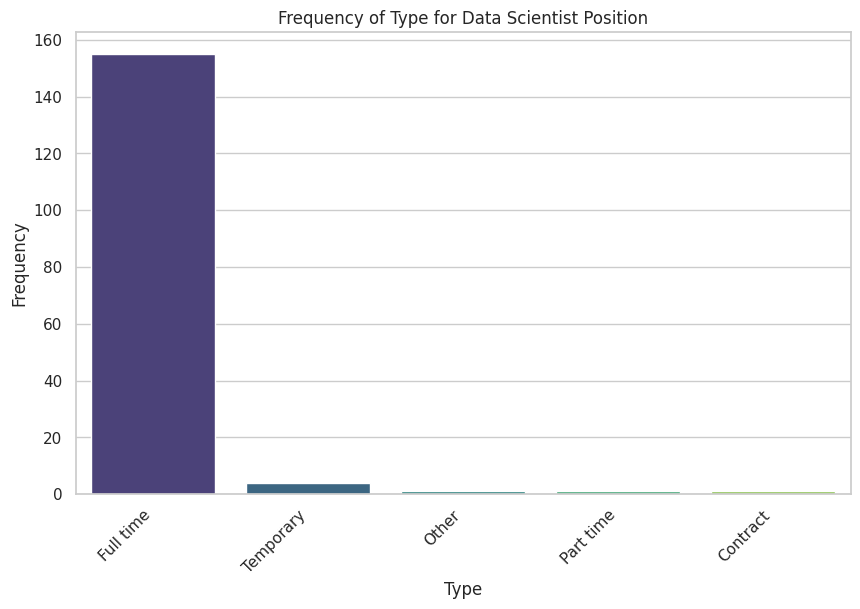

In [32]:
visualize_bar_plot(DS_df, 'Type')

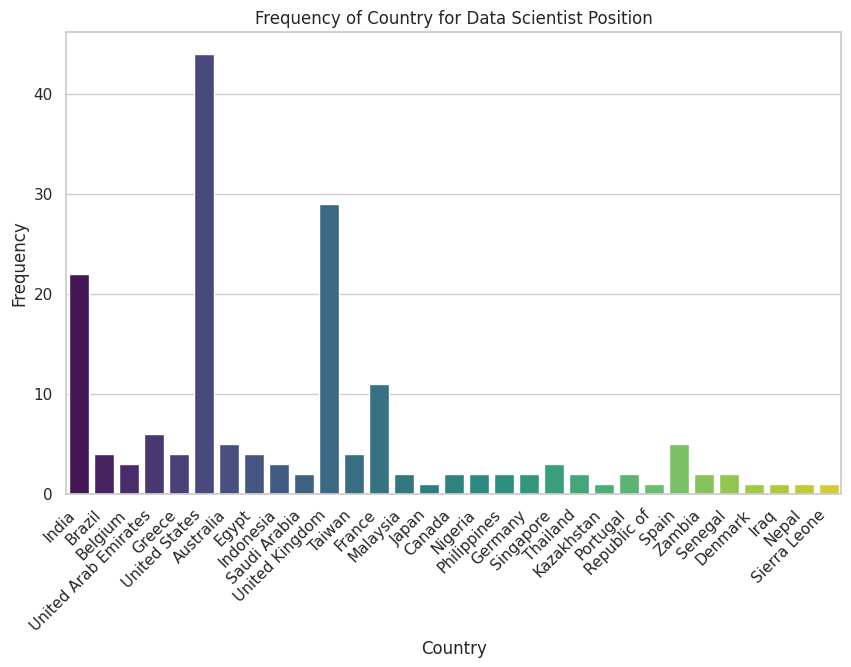

In [33]:
visualize_bar_plot(DS_df, 'Country')

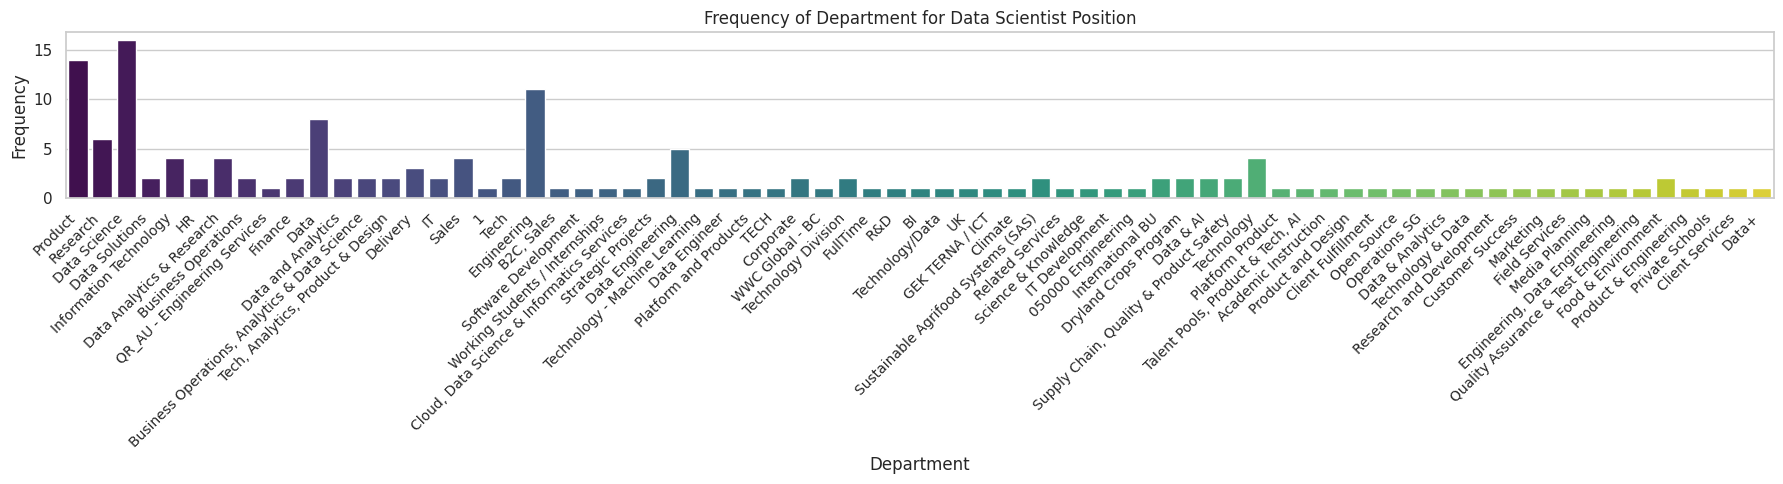

In [34]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Department', data=DS_df, palette='viridis')
plt.title(f'Frequency of Department for {DS_df["Category"].iloc[0]} Position')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and fontsize
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [35]:
fig = px.bar(DS_df, x='Department', title=f'Frequency of Department for {DS_df["Category"].iloc[0]} Position', labels={'Department': 'Frequency'}, height=400)
fig.update_layout(xaxis=dict(tickangle=-45, tickfont=dict(size=10)), margin=dict(l=0, r=0, t=30, b=0))

fig.show()

## HR Analysis

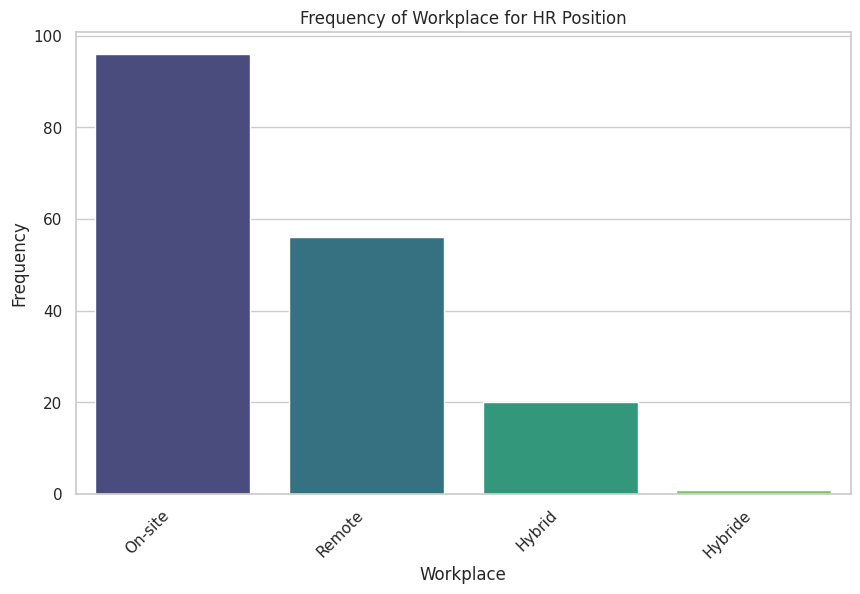

In [36]:
visualize_bar_plot(HR_df, 'Workplace')

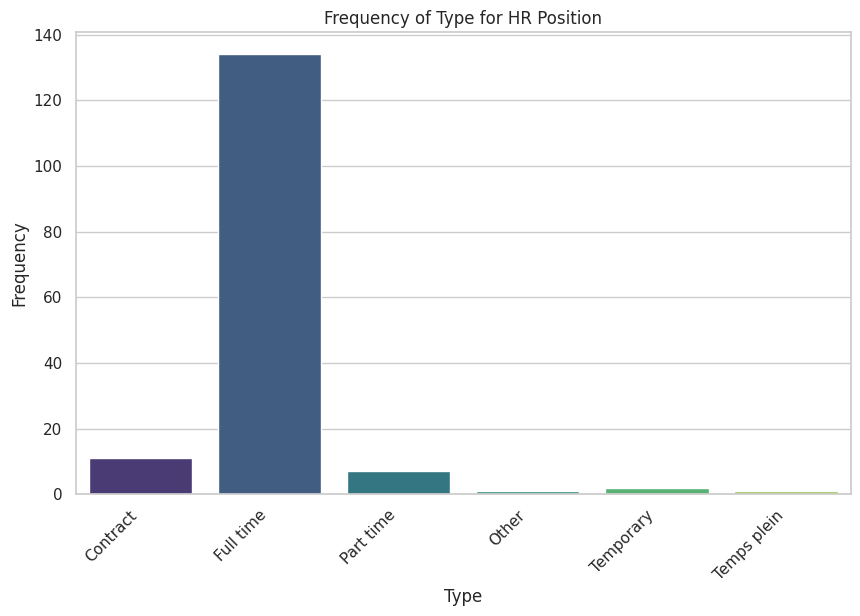

In [37]:
visualize_bar_plot(HR_df, 'Type')

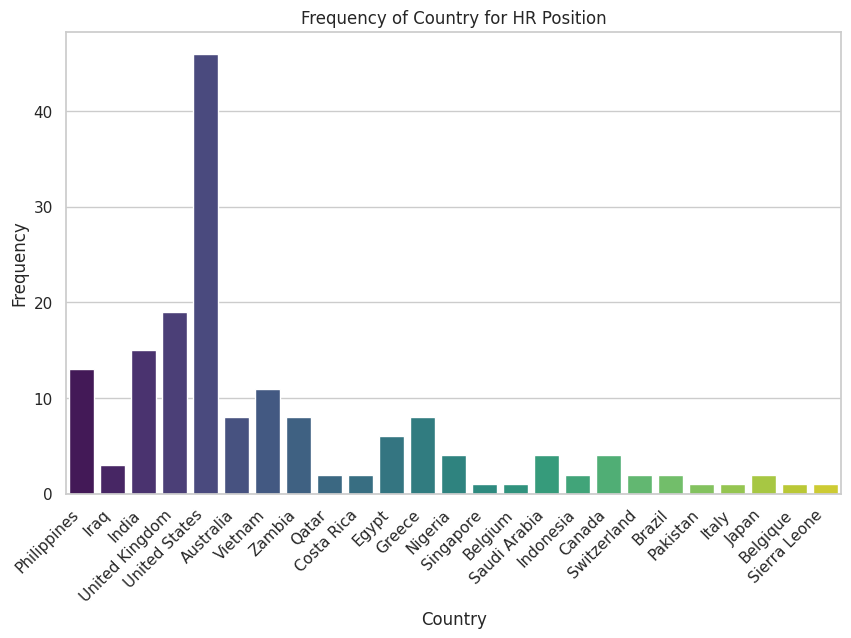

In [38]:
visualize_bar_plot(HR_df, 'Country')

/tmp/ipykernel_33/2629429965.py:7: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



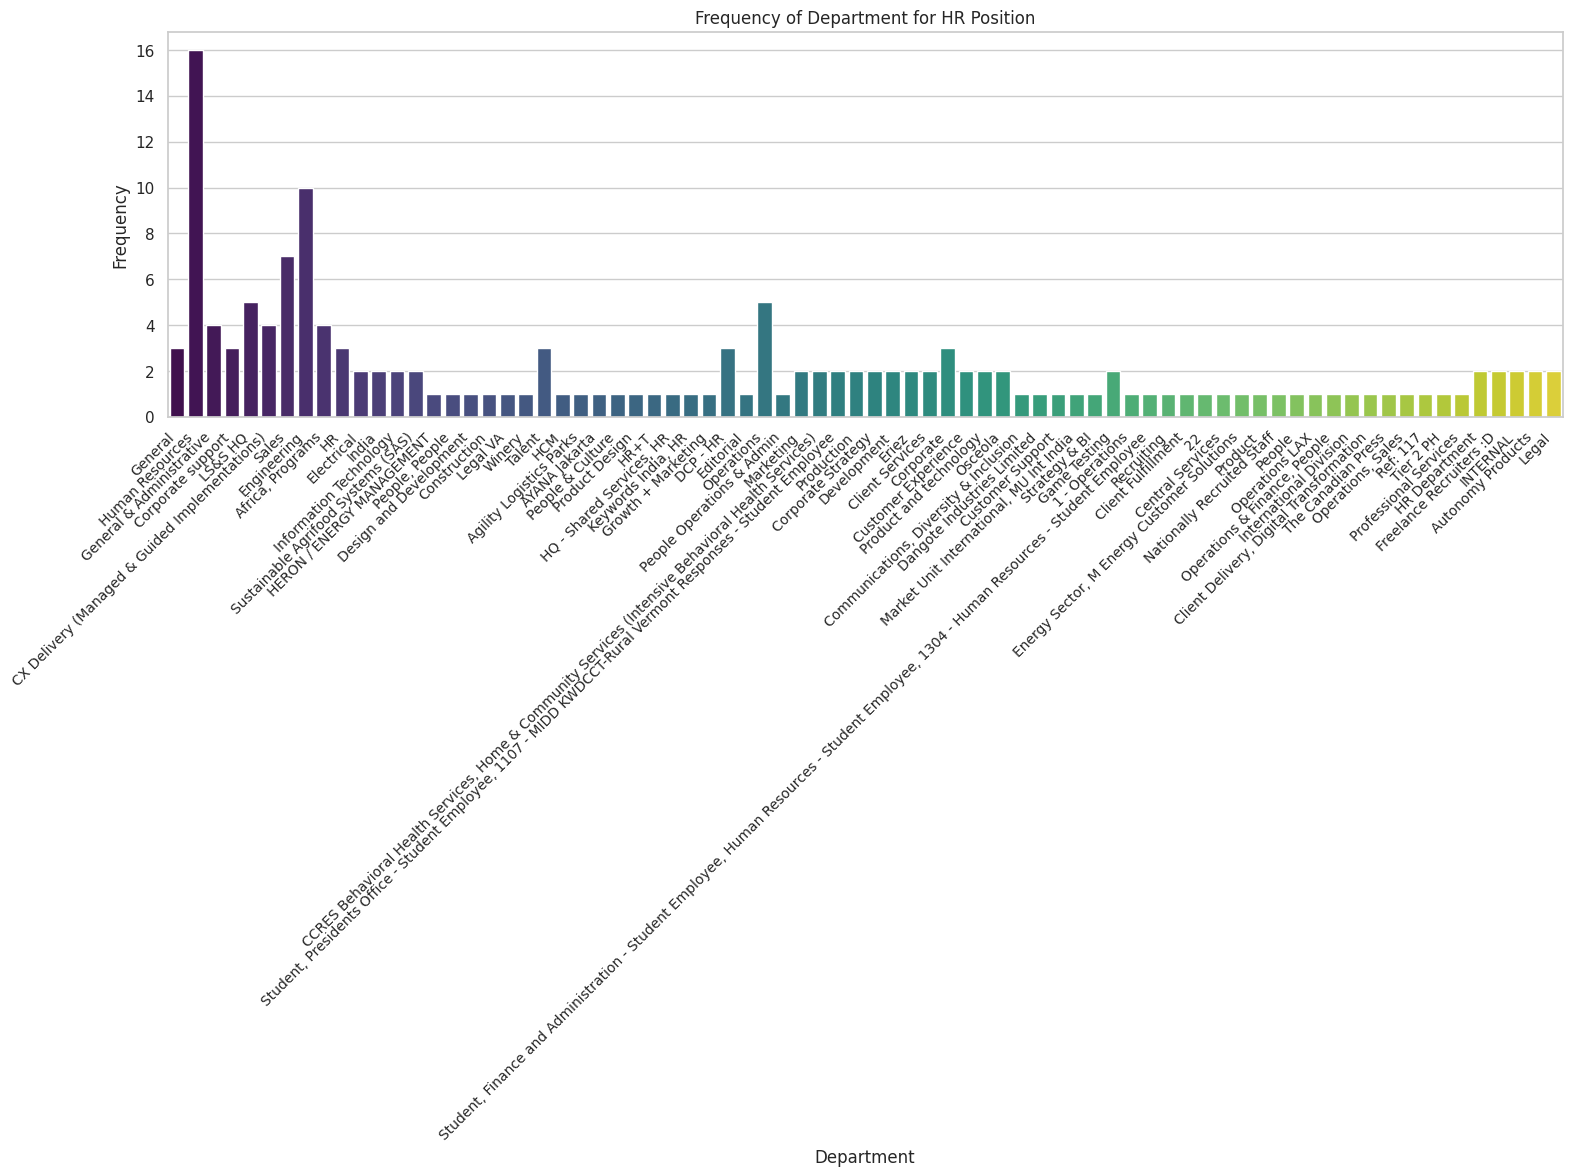

In [39]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Department', data=HR_df, palette='viridis')
plt.title(f'Frequency of Department for {HR_df["Category"].iloc[0]} Position')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and fontsize
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [40]:
fig = px.bar(HR_df, x='Department', title=f'Frequency of Department for {HR_df["Category"].iloc[0]} Position', labels={'Department': 'Frequency'}, height=400)
fig.update_layout(xaxis=dict(tickangle=-45, tickfont=dict(size=10)), margin=dict(l=0, r=0, t=30, b=0))

fig.show()

## Software Developer Analysis

In [41]:
SD_df.isnull().sum()

Category       0
Workplace     15
Location      13
Department    26
Type          28
Country       13
dtype: int64

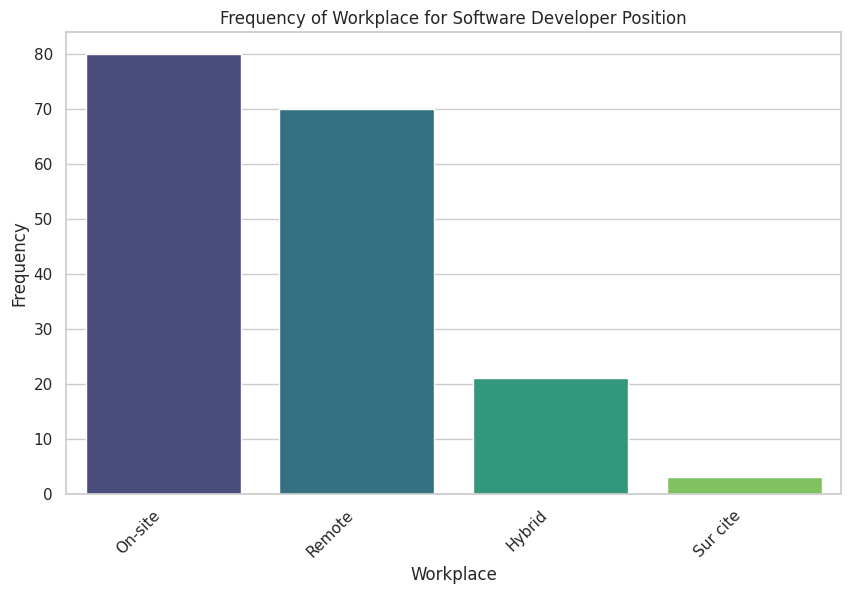

In [42]:
visualize_bar_plot(SD_df, 'Workplace')

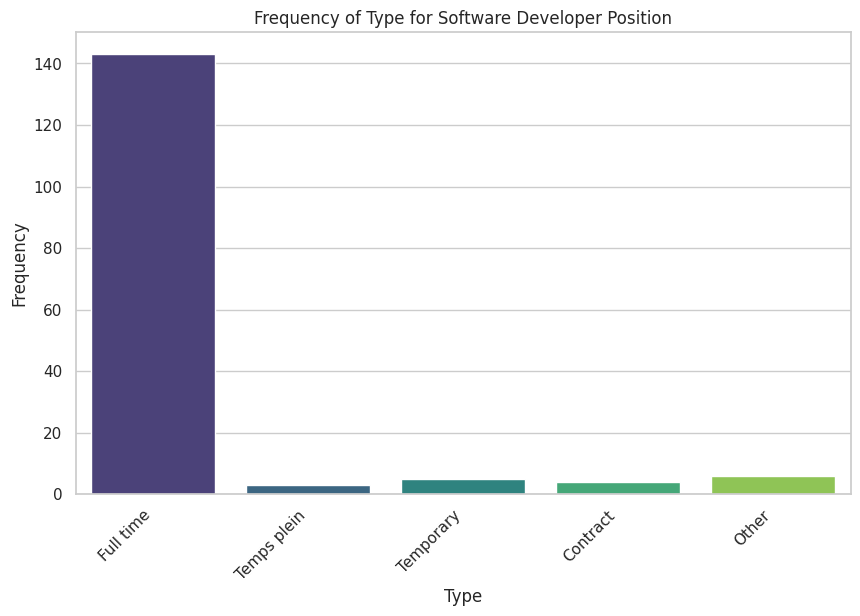

In [43]:
visualize_bar_plot(SD_df, 'Type')

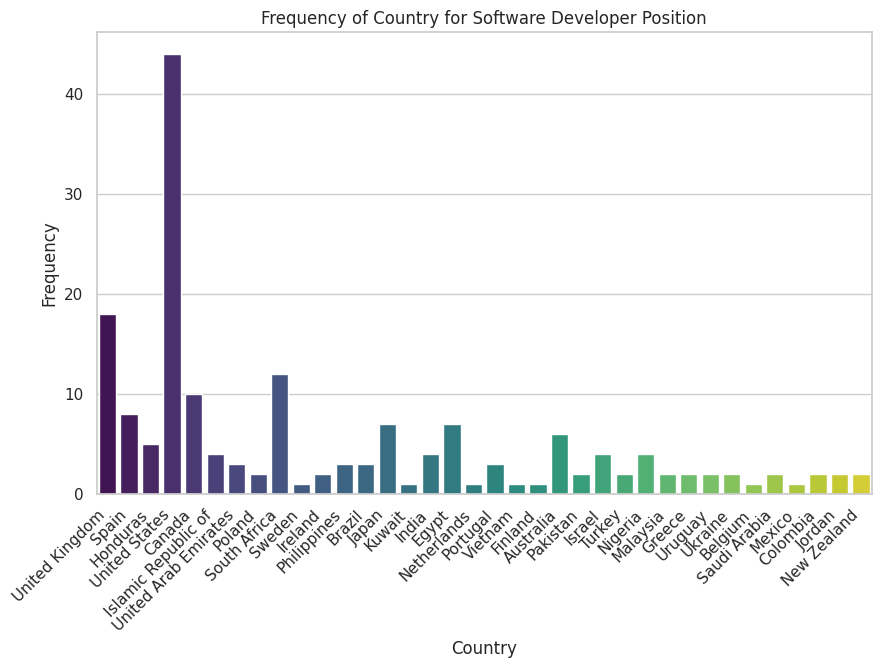

In [44]:
visualize_bar_plot(SD_df, 'Country')

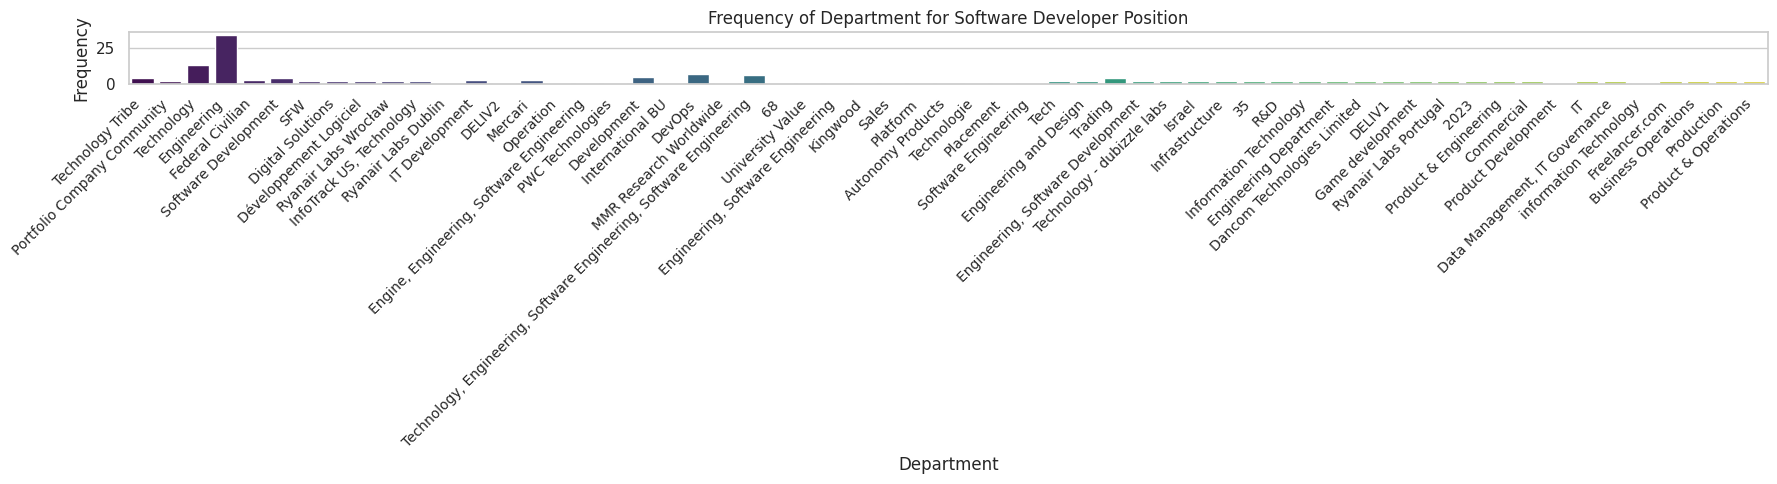

In [45]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Department', data=SD_df, palette='viridis')
plt.title(f'Frequency of Department for {SD_df["Category"].iloc[0]} Position')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and fontsize
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [46]:
fig = px.bar(SD_df, x='Department', title=f'Frequency of Department for {SD_df["Category"].iloc[0]} Position', labels={'Department': 'Frequency'}, height=400)
fig.update_layout(xaxis=dict(tickangle=-45, tickfont=dict(size=10)), margin=dict(l=0, r=0, t=30, b=0))

fig.show()

## UI/UX Analysis

In [47]:
UI_df.isnull().sum()

Category       0
Workplace      9
Location      16
Department    33
Type          30
Country       16
dtype: int64

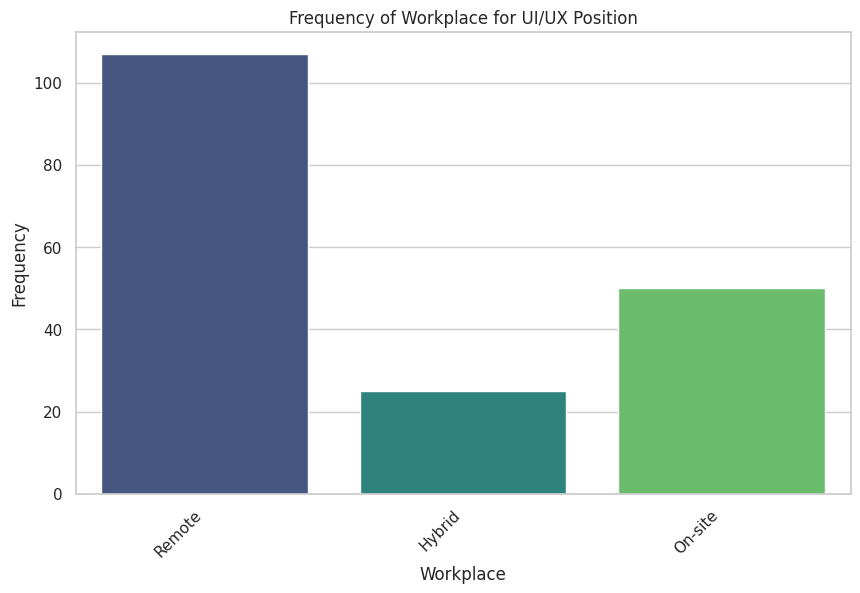

In [48]:
visualize_bar_plot(UI_df, 'Workplace')

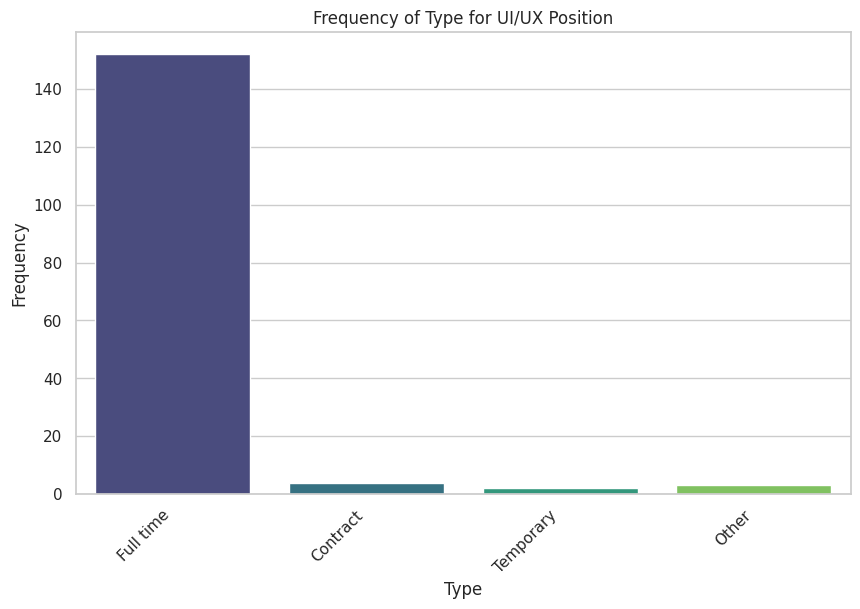

In [49]:
visualize_bar_plot(UI_df, 'Type')

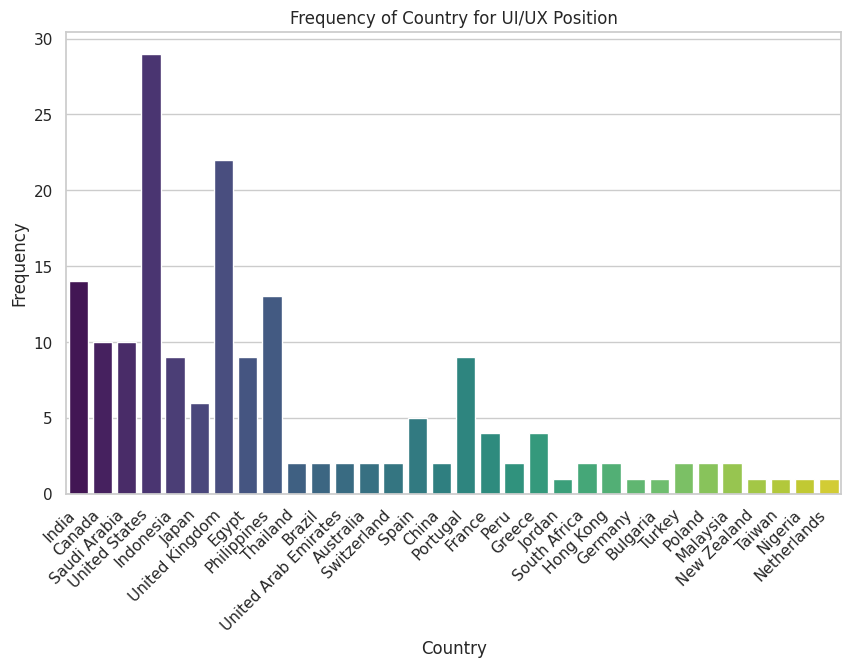

In [50]:
visualize_bar_plot(UI_df, 'Country')

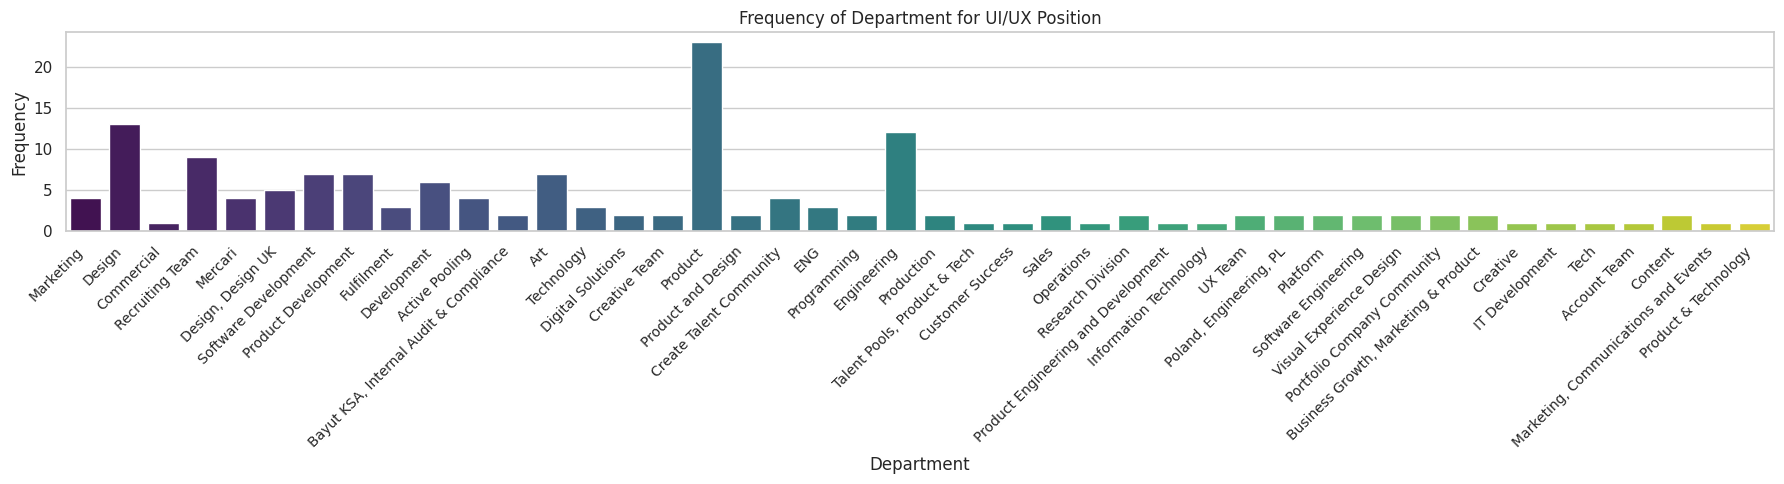

In [51]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Department', data=UI_df, palette='viridis')
plt.title(f'Frequency of Department for {UI_df["Category"].iloc[0]} Position')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and fontsize
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [52]:
fig = px.bar(UI_df, x='Department', title=f'Frequency of Department for {UI_df["Category"].iloc[0]} Position', labels={'Department': 'Frequency'}, height=400)
fig.update_layout(xaxis=dict(tickangle=-45, tickfont=dict(size=10)), margin=dict(l=0, r=0, t=30, b=0))

fig.show()

# Uncover Data Dynamics: A Deep Dive into Essential Subplots

In [53]:
colors = ['darkgray', 'darkgreen', 'darkblue', 'darkred','mediumblue', 'yellow']

In [54]:
def visualize_factors(dataframe, colors):
    # Create subplot with titles
    fig = sp.make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            f'Frequency of Workplace for {dataframe["Category"].iloc[0]} Position',
            f'Frequency of Type for {dataframe["Category"].iloc[0]} Position',
            f'Frequency of Country for {dataframe["Category"].iloc[0]} Position',
            f'Frequency of Department for {dataframe["Category"].iloc[0]} Position'
        ],
        row_heights=[0.5, 0.5]
    )
    
    # Randomly select a color for each subplot
    subplot_colors = random.sample(colors, 4)

    # Subplot 1
    fig.add_trace(go.Bar(x=dataframe['Workplace'].value_counts().index, y=dataframe['Workplace'].value_counts(), marker=dict(color=subplot_colors[0])),
                  row=1, col=1)

    # Subplot 2
    fig.add_trace(go.Bar(x=dataframe['Type'].value_counts().index, y=dataframe['Type'].value_counts(), marker=dict(color=subplot_colors[1])),
                  row=1, col=2)

    # Subplot 3
    fig.add_trace(go.Bar(x=dataframe['Country'].value_counts().index, y=dataframe['Country'].value_counts(), marker=dict(color=subplot_colors[2])),
                  row=2, col=1)
    fig.update_xaxes(title_text='Country', tickangle=-45, tickfont=dict(size=10), row=2, col=1)

    # Subplot 4
    fig.add_trace(go.Bar(x=dataframe['Department'].value_counts().index, y=dataframe['Department'].value_counts(), marker=dict(color=subplot_colors[3])),
                  row=2, col=2)
    fig.update_xaxes(title_text='Department', tickangle=-45, tickfont=dict(size=10), row=2, col=2)

    # Update layout
    fig.update_layout(title_text=f'Frequency of Different Factors for {dataframe["Category"].iloc[0]} Position', height=1000, showlegend=False)

    # Show the interactive subplot
    fig.show()

In [55]:
visualize_factors(BA_df, colors)

In [56]:
visualize_factors(cloud_df, colors)

In [57]:
visualize_factors(DS_df, colors)

In [58]:
visualize_factors(HR_df, colors)

In [59]:
visualize_factors(SD_df, colors)

In [60]:
visualize_factors(UI_df, colors)

# Conclusion Report

### Global Analysis:

#### Job Counts by Category:
1. **UI/UX:** 191 positions (17.4%)
2. **Data Scientist:** 190 positions (17.4%)
3. **Software Developer:** 189 positions (17.3%)

#### Geographic Trends:
- **Most Dominant Country in Job Offers:** USA, followed by United Kingdom, then India.
- **Most Common Job Workplace:** On-site (44.4%), Remote (39.7%), Hybrid (15.5%).
- **Most Dominant Job Type:** Full-time (91.4%).
- **Most Common Departments:** Engineering, followed by Product and Technology.

### Job Category Analysis:

#### Business Analyst (BA):
- **Most Frequent Workplace:** On-site, followed by Remote and Hybrid.
- **Most Dominant Job Type:** Full-time.
- **Most Frequent Countries for BA Positions:** USA, followed by United Kingdom.

#### Cloud Position:
- **Most Frequent Workplace:** Remote, followed by On-site and Hybrid.
- **Most Dominant Job Type:** Full-time.
- **Most Frequent Countries for Cloud Positions:** USA, followed by India.

#### Data Scientist Position:
- **Most Frequent Workplace:** On-site, followed by Remote and Hybrid.
- **Most Dominant Job Type:** Full-time.
- **Most Frequent Countries for Data Scientist Positions:** USA, followed by United Kingdom and India.

#### HR Analysis:
- **Most Frequent Workplace:** On-site, followed by Remote and Hybrid.
- **Most Dominant Job Type:** Full-time.
- **Most Frequent Countries for HR Positions:** USA, followed by United Kingdom and India.

#### Software Developer:
- **Most Frequent Workplace:** On-site, followed by Remote and Hybrid.
- **Most Dominant Job Type:** Full-time.
- **Most Frequent Countries for Software Developer Positions:** USA, followed by United Kingdom and South Africa.

#### UI/UX Analysis:
- **Most Frequent Workplace:** Remote, followed by On-site and Hybrid.
- **Most Dominant Job Type:** Full-time.
- **Most Frequent Countries for UI/UX Positions:** USA, followed by United Kingdom and India.

### Summary:

The global analysis highlights a diverse distribution of job positions, with UI/UX, Data Scientist, and Software Developer roles being the top three. The USA is the most dominant country in terms of job offers, and on-site work remains prevalent, though remote and hybrid options are also significant.

In the job category analysis, each role's preferred workplace, dominant job type, and the countries with the highest demand are outlined. This information can guide job seekers, recruiters, and organizations in understanding the current trends and preferences within each category. The detailed breakdown allows for targeted strategies in recruitment and job search activities.